In [ ]:
import numpy as np
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from torch.ao.quantization.utils import activation_dtype

## Load data

In [2]:
(X_train, y_train) , (X_test, y_test)  = fashion_mnist.load_data()

4422102/4422102 [==============================] - 9s 2us/step


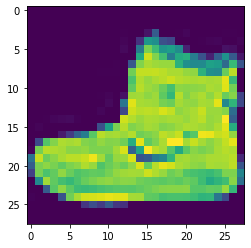

In [3]:
plt.imshow(X_train[0])

In [4]:
print(y_train[0])

9


| Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)), # Input layer 1
    Dense(128, activation='relu'),   # Hidden layer 2
    Dense(10, activation='softmax')  # Output layer 3
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# X_train = X_train.reshape(X_train.shape[0], -1)
# X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 3.0269 - accuracy: 0.6817
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6467 - accuracy: 0.7686
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5856 - accuracy: 0.7955
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5603 - accuracy: 0.8060
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5396 - accuracy: 0.8131
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5215 - accuracy: 0.8193
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5074 - accuracy: 0.8254
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5005 - accuracy: 0.8275
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4875 - accuracy: 0.8334
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [9]:
model.save('../Models/fashion_classifier.h5')

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


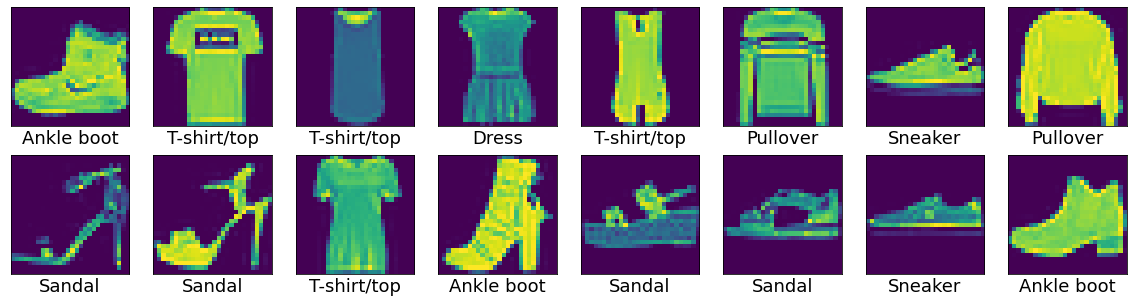

In [13]:
def show_img(X, y):
    plt.figure(figsize=(20, 5))
    for i in range(16):
        plt.subplot(2, 8, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i])
        plt.xlabel(class_names[y[i]], fontsize='18')
    plt.show()
show_img(X_train, y_train)

In [39]:
predict = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [40]:
predict = np.argmax(predict, axis=1)

(10000,)

851